In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [32]:
df = pd.read_csv('fcc-forum-pageviews.csv',index_col='date')
# not required here
# df['date'] = pd.to_datetime(df['date'])
# df.set_index('date', inplace=True)
df.head()

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933


In [11]:
df_cleaned = df[(df['value'] >= df['value'].quantile(0.025)) & (df['value'] <= df['value'].quantile(0.975))]

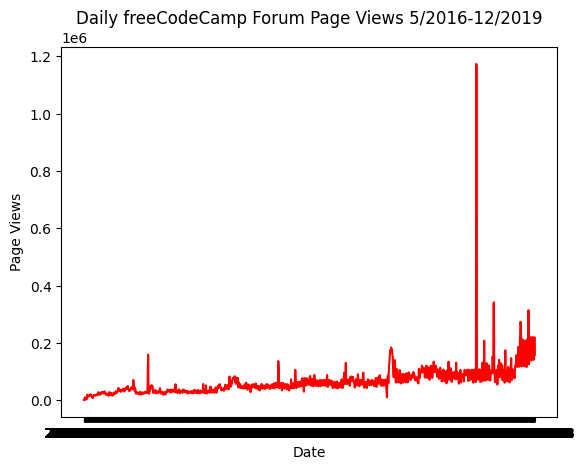

In [18]:
plt.plot(df.index,df['value'],color='red')
plt.title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
plt.xlabel('Date')
plt.ylabel('Page Views')
plt.show()

In [53]:
date = pd.to_datetime(df.index)
df['year'] = date.year
df['month'] = date.strftime('%B')


,value,year,month
date,,,
2016-05-09,1201,2016,May
2016-05-10,2329,2016,May
2016-05-11,1716,2016,May
2016-05-12,10539,2016,May
2016-05-13,6933,2016,May
...,...,...,...
2019-11-29,171584,2019,November
2019-11-30,141161,2019,November
2019-12-01,142918,2019,December


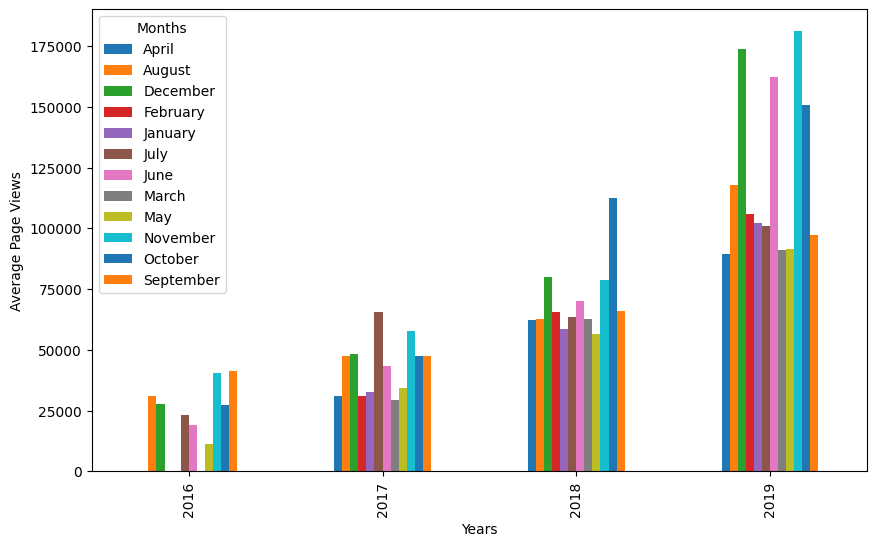

In [54]:
# Draw bar plot
df_grouped = df.groupby(['year', 'month'])['value'].mean().unstack()
df_grouped.plot(kind='bar', figsize=(10,6))
plt.xlabel('Years')
plt.ylabel('Average Page Views')
plt.legend(title='Months')
plt.show()

C:\Users\aryan\AppData\Local\Temp\ipykernel_10284\1098463252.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='year', y='value', data=df_box, ax=axes[0],palette=colors,showfliers=False)
C:\Users\aryan\AppData\Local\Temp\ipykernel_10284\1098463252.py:9: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.boxplot(x='year', y='value', data=df_box, ax=axes[0],palette=colors,showfliers=False)
C:\Users\aryan\AppData\Local\Temp\ipykernel_10284\1098463252.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='month', y='value', data=df_box, ax=axes[1],palette=colors,showfliers=False)
C:\Users\aryan\AppData\Local\Temp\ipykernel_10284\1098463252

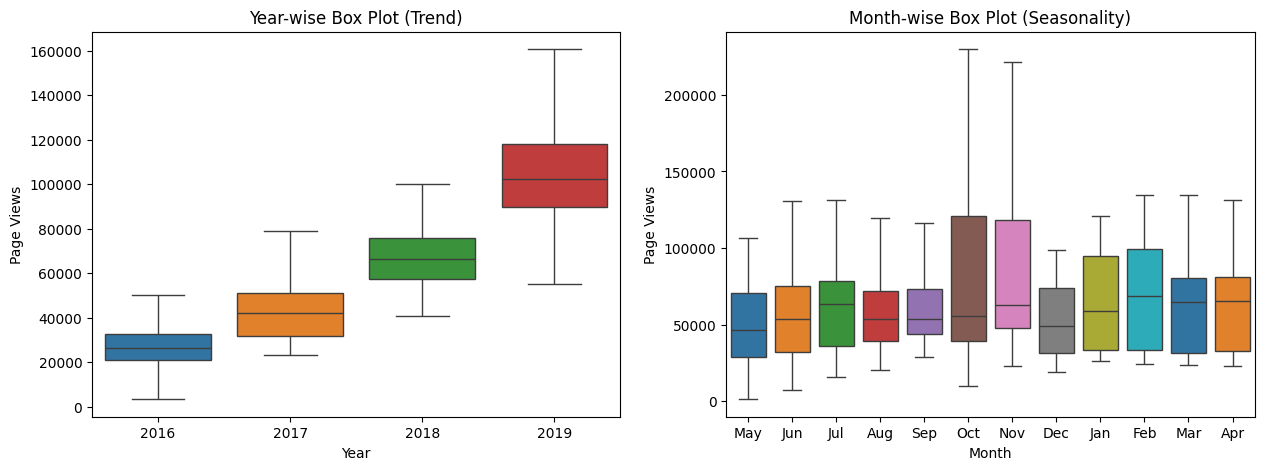

In [59]:
# Prepare data for box plots (this part is done!)
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf"]
df_box = df.copy()
df_box.reset_index(inplace=True)
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]
# Draw box plots (using Seaborn)
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
sns.boxplot(x='year', y='value', data=df_box, ax=axes[0],palette=colors,showfliers=False)
sns.boxplot(x='month', y='value', data=df_box, ax=axes[1],palette=colors,showfliers=False)
axes[0].set_title('Year-wise Box Plot (Trend)')
axes[1].set_title('Month-wise Box Plot (Seasonality)')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Page Views')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Page Views')

plt.show()